In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('SalaryPrediction.csv')
df.head()

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,"46,427,000",23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,"42,125,000",30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,"34,821,000",35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,"19,959,000",31,R. Madrid,La Liga,BEL,Forward,443,120
4,"19,500,000",31,Man UFC,Premier League,ESP,Goalkeeper,480,45


In [9]:
df.sample(5)

,Wage,Age,Club,League,Nation,Position,Apps,Caps
1297,"1,017,000",26,Sevilla,La Liga,BRA,Defender,183,0
3635,"20,000",18,VTSC,Primiera Liga,POR,Defender,0,0
3018,"65,000",27,Chaves,Primiera Liga,POR,Midfilder,187,0
2746,"104,000",22,Arsenal,Premier League,NOR,Forward,40,0
974,"1,560,000",30,Chelsea,Premier League,ENG,Goalkeeper,225,0


In [11]:
df.shape

(3907, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Wage      3907 non-null   object
 1   Age       3907 non-null   int64 
 2   Club      3907 non-null   object
 3   League    3907 non-null   object
 4   Nation    3907 non-null   object
 5   Position  3907 non-null   object
 6   Apps      3907 non-null   int64 
 7   Caps      3907 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 244.3+ KB


Since the dtype of wage should be int, it is object, so we change that.

In [63]:
df['Wage'] = df.Wage.str.replace(',', '').astype(int)
df.Wage.dtypes

dtype('int32')

In [15]:
df.describe()

,Age,Apps,Caps
count,3907.000000,3907.000000,3907.000000
mean,24.120553,140.057077,8.926542
std,4.935638,131.694425,20.518234
min,18.000000,0.000000,0.000000
25%,20.000000,15.000000,0.000000
50%,24.000000,115.000000,0.000000
75%,28.000000,224.500000,6.000000
max,41.000000,715.000000,180.000000


In [17]:
categorical_cols = [cols for cols in df.columns if df[cols].nunique() < 10 and df[cols].dtype in ['int64', 'object']]
categorical_cols

['League', 'Position']

In [19]:
df.League.value_counts()

League
Premier League       875
Primiera Liga        747
Serie A              670
La Liga              594
Bundesliga           557
Ligue 1 Uber Eats    464
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ligue 1 Uber Eats'),
  Text(1, 0, 'La Liga'),
  Text(2, 0, 'Premier League'),
  Text(3, 0, 'Serie A'),
  Text(4, 0, 'Bundesliga'),
  Text(5, 0, 'Primiera Liga')])

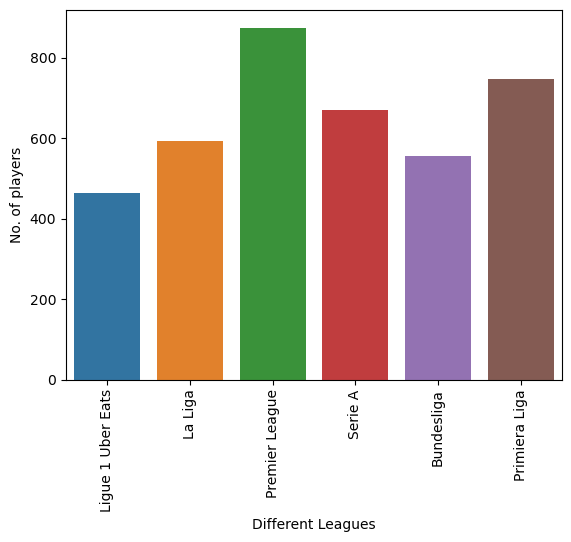

In [31]:
sns.countplot(x='League', data=df, hue='League')
plt.xlabel("Different Leagues")
plt.ylabel("No. of players")
plt.xticks(rotation=90)

In [77]:
df.groupby('League')['Wage'].max()

League
Bundesliga           15476000
La Liga              19959000
Ligue 1 Uber Eats    46427000
Premier League       19500000
Primiera Liga         6878000
Serie A              18200000
Name: Wage, dtype: int32

<Axes: ylabel='count'>

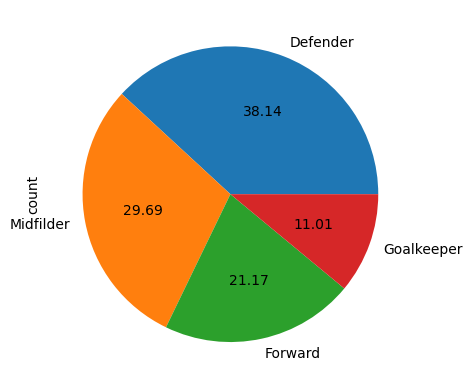

In [71]:
df.Position.value_counts().plot(kind='pie', autopct='%.2f')

In [81]:
numerical_cols = df.drop(categorical_cols, axis=1)
numerical_cols

,Wage,Age,Club,Nation,Apps,Caps
0,46427000,23,PSG,FRA,190,57
1,42125000,30,PSG,BRA,324,119
2,34821000,35,PSG,ARG,585,162
3,19959000,31,R. Madrid,BEL,443,120
4,19500000,31,Man UFC,ESP,480,45
...,...,...,...,...,...,...
3902,3400,19,Vigo,ESP,0,0
3903,3200,18,Famalicao,BRA,0,0
3904,2900,18,Vigo,ESP,0,0
3905,2700,18,Vigo,ESP,0,0


(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(-25.0, 0, '−25'),
  Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175'),
  Text(200.0, 0, '200')])

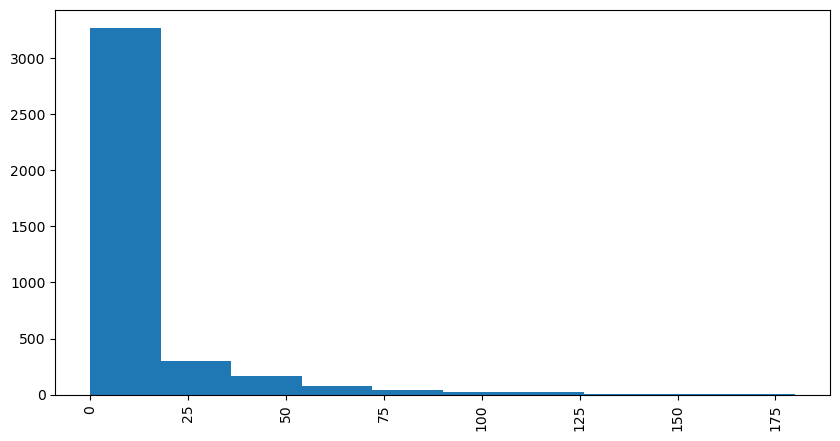

In [115]:
plt.figure(figsize=(10, 5))
plt.hist(df.Caps)
plt.xticks(rotation=90)

C:\Users\12368\AppData\Local\Temp\ipykernel_19568\1239919984.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

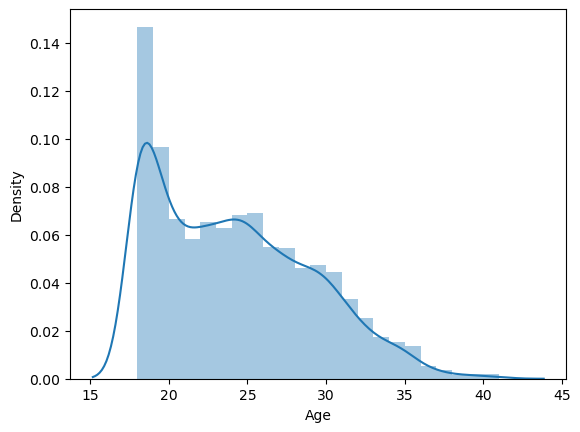

In [97]:
sns.distplot(df.Age)